In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Define paths
import os
zip_file_path = '/content/drive/MyDrive/consumer_complaints_analysis/complaints.csv.zip'
extract_dir = '/content/extracted_files'
os.makedirs(extract_dir, exist_ok=True)



In [3]:
# Extract the zip file
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

# Plotly libraries
import plotly
import plotly.express as px
import plotly.graph_objs as go
#import chart_studio.plotly as py

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

In [5]:

csv_file_path = os.path.join(extract_dir, 'complaints.csv')
df = pd.read_csv(csv_file_path)
print(df.head())

  Date received                                            Product  \
0    2024-02-26  Credit reporting or other personal consumer re...   
1    2024-02-26  Credit reporting or other personal consumer re...   
2    2024-02-26  Credit reporting or other personal consumer re...   
3    2024-02-26  Credit reporting or other personal consumer re...   
4    2024-02-26  Credit reporting or other personal consumer re...   

        Sub-product                                 Issue  \
0  Credit reporting           Improper use of your report   
1  Credit reporting  Incorrect information on your report   
2  Credit reporting  Incorrect information on your report   
3  Credit reporting  Incorrect information on your report   
4  Credit reporting           Improper use of your report   

                                       Sub-issue Consumer complaint narrative  \
0  Reporting company used your report improperly                          NaN   
1            Information belongs to someone else  

In [9]:
# Define the path where you want to save the file in Google Drive
output_path = '/content/drive/MyDrive/processed_complaints.csv'

# Save the DataFrame as a CSV file to the specified path in Google Drive
df.to_csv(output_path, index=False)



In [6]:
df.sample(n=20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3004035,2019-01-04,Vehicle loan or lease,Loan,Managing the loan or lease,Problem with fees charged,I am sending a request for complain for my car...,NaN,Santander Consumer USA Holdings Inc.,MD,20902,NaN,Consent provided,Web,2019-01-04,Closed with explanation,Yes,NaN,3116944
2610432,2021-06-12,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,i Filed a dispute in regards to the incorrect ...,NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,11510,NaN,Consent provided,Web,2021-06-12,Closed with explanation,Yes,NaN,4454718
5265764,2017-07-09,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,I hope you can help me out. I 've been trying ...,NaN,"Community Loan Servicing, LLC (formerly known ...",WI,531XX,NaN,Consent provided,Web,2017-07-09,Closed with explanation,Yes,NaN,2569532
4072367,2018-03-06,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Charged too much interest,NaN,NaN,"Bread Financial Holdings, Inc.",OH,43082,NaN,NaN,Referral,2018-03-06,Closed with explanation,Yes,NaN,2835229
1532873,2023-06-05,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NC,28052,NaN,Consent not provided,Web,2023-06-05,Closed with non-monetary relief,Yes,NaN,7070977
2229586,2022-08-29,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Problem with fees,Capital One charges interest on the month when...,NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,33021,NaN,Consent provided,Web,2022-08-29,Closed with monetary relief,Yes,NaN,5928462
2406878,2022-01-21,"Payday loan, title loan, or personal loan",Installment loan,Charged fees or interest you didn't expect,NaN,NaN,NaN,"Colony Brands, Inc.",NJ,07036,NaN,Consent not provided,Web,2022-02-02,Closed with explanation,Yes,NaN,5133772
4804351,2024-04-15,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NY,11413,NaN,NaN,Web,2024-04-15,Closed with explanation,Yes,NaN,8776270
1736365,2021-03-17,Mortgage,Reverse mortgage,Closing on a mortgage,NaN,In XX/XX/2019 my XXXX year old mother was cont...,Company disputes the facts presented in the co...,Benefit Mortgage,CA,91324,"Older American, Servicemember",Consent provided,Web,2021-05-06,Closed with explanation,Yes,NaN,4222083
4252317,2013-05-10,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,Ocwen Financial Corporation,MD,21222,NaN,NaN,Phone,2013-05-13,Closed with explanation,Yes,No,404637


In [7]:
df.shape

(5358365, 18)

In [8]:
df.columns= df.columns.str.title()
df.columns

Index(['Date Received', 'Product', 'Sub-Product', 'Issue', 'Sub-Issue',
       'Consumer Complaint Narrative', 'Company Public Response', 'Company',
       'State', 'Zip Code', 'Tags', 'Consumer Consent Provided?',
       'Submitted Via', 'Date Sent To Company', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?', 'Complaint Id'],
      dtype='object')

In [9]:
df['Consumer Disputed?'].value_counts()

Consumer Disputed?
No     619938
Yes    148378
Name: count, dtype: int64

In [10]:
df['Consumer Disputed?'].isna().sum()

4590049

In [11]:

# Our  missing value present in 'Consumer Disputed?' column
df['Consumer Disputed?'].isna().sum()/df['Consumer Disputed?'].shape[0]*100

#SO WE GET OR 85.6 PERCENT ARE NULL VALUES IN 'Consumer Disputed?'COLUMNS.

85.66137245223123

In [12]:
mode_value=df['Consumer Disputed?'].mode()
mode_value ='No'

In [13]:
df['Consumer Disputed?'].fillna(mode_value,inplace=True)

In [14]:
df.isnull().sum()

Date Received                         0
Product                               0
Sub-Product                      235294
Issue                                 5
Sub-Issue                        737797
Consumer Complaint Narrative    3482998
Company Public Response         2781194
Company                               0
State                             46005
Zip Code                          30225
Tags                            4867806
Consumer Consent Provided?      1048510
Submitted Via                         0
Date Sent To Company                  0
Company Response To Consumer         15
Timely Response?                      0
Consumer Disputed?                    0
Complaint Id                          0
dtype: int64

#  Our data Null values

In [15]:
# getting the sum of null values and ordering.
total = df.isnull().sum().sort_values(ascending = False)

#getting the percent and order of null.
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending =False)

# Concatenating the total and percent
df_concat = pd.concat([total , percent],axis =1,keys=['Total' ,'Percent'])

# Returning values of nulls different of 0
(df_concat[~(df_concat['Total'] == 0)])

,Total,Percent
Tags,4867806,90.844987
Consumer Complaint Narrative,3482998,65.001134
Company Public Response,2781194,51.903780
Consumer Consent Provided?,1048510,19.567723
Sub-Issue,737797,13.769069
Sub-Product,235294,4.391153
State,46005,0.858564
Zip Code,30225,0.564071
Company Response To Consumer,15,0.000280
Issue,5,0.000093


# Summary Statistics

In [16]:
df[['Date Received','Product','Sub-Product','Issue','Sub-Issue','Consumer Complaint Narrative',
               'Company','Company Public Response','Consumer Consent Provided?',
               'Company Response To Consumer','Submitted Via','State']].describe().transpose()


,count,unique,top,freq
Date Received,5358365,4568,2024-05-15,8773
Product,5358365,21,"Credit reporting, credit repair services, or o...",2163876
Sub-Product,5123071,86,Credit reporting,3259621
Issue,5358360,178,Incorrect information on your report,1580271
Sub-Issue,4620568,272,Information belongs to someone else,1046924
Consumer Complaint Narrative,1875367,1514218,In accordance with the Fair Credit Reporting a...,8105
Company,5358365,7242,"EQUIFAX, INC.",1127668
Company Public Response,2577171,11,Company has responded to the consumer and the ...,2325327
Consumer Consent Provided?,4309855,4,Consent not provided,2163342
Company Response To Consumer,5358350,8,Closed with explanation,3520464


#
1.   **Date Received**  : we have complaints of 4568 unique Days. and we have highest complaints receieved on 2024-05-15.

2.   **Product**  : We have total 21 Unique Product, Out of which "Credit reporting, credit repair services, or other personal consumer reports" product recieved maximum Dissatisfication.

3.   **Issue** : Max issue is "Incorrect information on your report".

4.   **Sub-Issue** : Max number of sub issue is "Information belongs to someone else	"

5.   **Company Public Response** 	: Most is "Company has responded to the consumer and the CFPB and chooses not to provide a public response	"

6.   **Company** : There are Total 7242 Unique companies.Out of which max complaints to the "EQUIFAX, INC." company around (1127668/ 5358365	* 100) 21 percent of all complaints received.

7.  **State** : FL (Florida)  has received max complaints.














# Top 15 Company which have high Complaints Volume

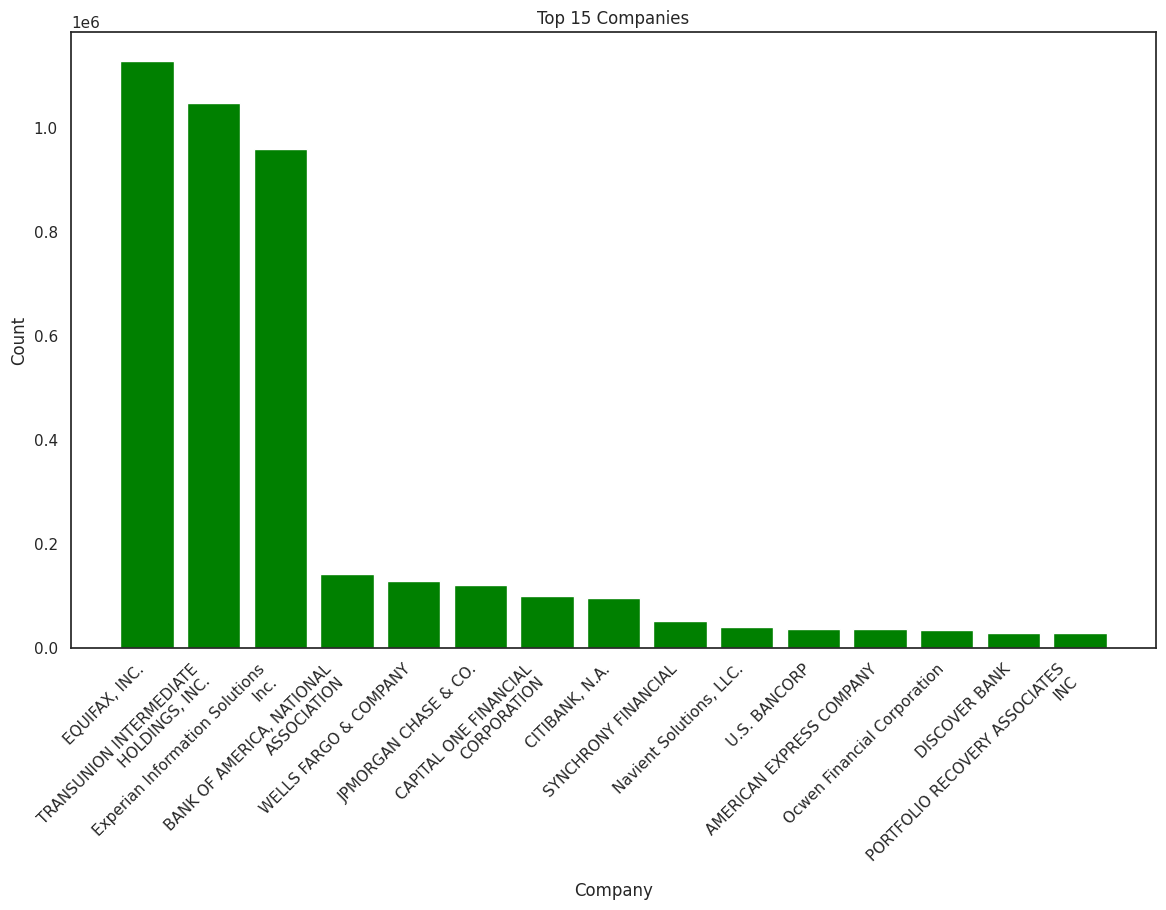

In [17]:
# Set seaborn style
sns.set(style='white')

# Compute value counts and get the top 15 companies
top_companies = df['Company'].str.strip("'").value_counts().nlargest(15)

# Adjust the company labels to wrap text
wrapped_company_labels = ['\n'.join(wrap(label, 30)) for label in top_companies.index]

# Plot the top 15 companies
plt.figure(figsize=(14,8))  # Increase figure size for better readability
bars = plt.bar(wrapped_company_labels, top_companies, color='green')
plt.title('Top 15 Companies')
plt.xlabel('Company')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [18]:
# As per the Visualisation we have three companies which has Massive compalaints compare to others.
total = df['Company'].value_counts().sum()
companies_to_count = ['TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'EQUIFAX, INC.', 'Experian Information Solutions Inc.']
counts = df['Company'].value_counts()[companies_to_count]
print('counts')
proportion = counts.sum() / total

print(proportion)


0.5848942727865682



** SO These companies 'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'EQUIFAX, INC.', 'Experian Information Solutions Inc.'  received maximum Complaints Around 58.48 percent.**

# What are the top 15 issues and sub issues?¶





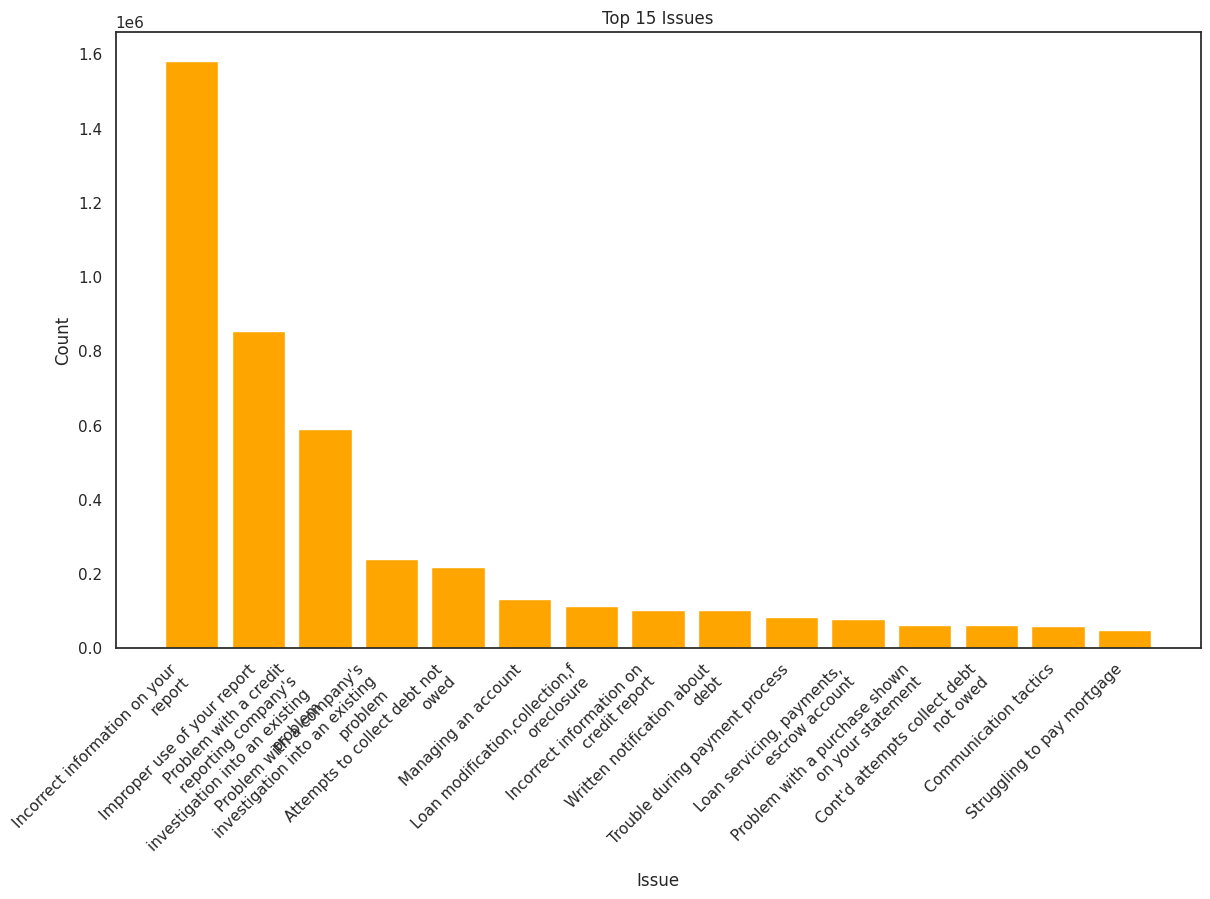

In [19]:


# Set seaborn style
sns.set(style='white')

# Compute value counts and get the top 15 issues
top_issues = df['Issue'].str.strip().value_counts().nlargest(15)

# Adjust the issue labels to wrap text
wrapped_labels = ['\n'.join(wrap(label, 30)) for label in top_issues.index]

# Plot the top 15 issues
plt.figure(figsize=(14,8))  # Increase figure size for better readability
bars = plt.bar(wrapped_labels, top_issues, color='orange')
plt.title('Top 15 Issues')
plt.xlabel('Issue')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

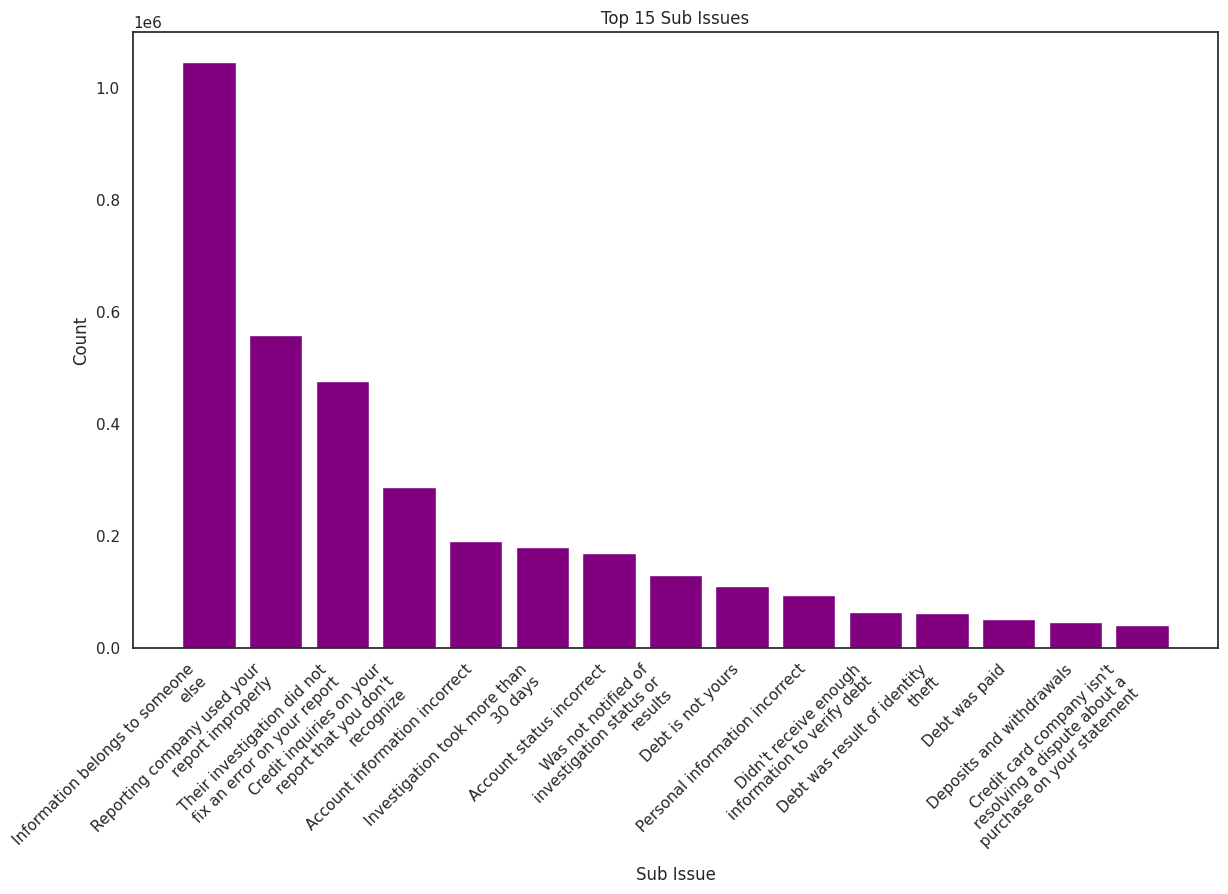

In [20]:
# Set seaborn style
sns.set(style='white')

# Compute value counts and get the top 15 sub-issues
top_sub_issues = df['Sub-Issue'].str.strip("'").value_counts().nlargest(15)

# Adjust the sub-issue labels to wrap text
wrapped_subissue_labels = ['\n'.join(wrap(label, 30)) for label in top_sub_issues.index]

# Plot the top 15 sub-issues
plt.figure(figsize=(14,8))  # Increase figure size for better readability
bars = plt.bar(wrapped_subissue_labels, top_sub_issues, color='purple')
plt.title('Top 15 Sub Issues')
plt.xlabel('Sub Issue')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

# In which month did most complaints occur and on which day of the week are most complaints received?

In [21]:
from datetime import datetime

In [23]:
df['Date'] =pd.to_datetime(df['Date Received'])

#Extracting Year.
df['Year'] = df['Date'].dt.year

#Extracting Month.
df['Month'] =df['Date'].dt.month_name()

#Extracting Weekdays

df['Week_Days'] = df['Date'].dt.day_name()

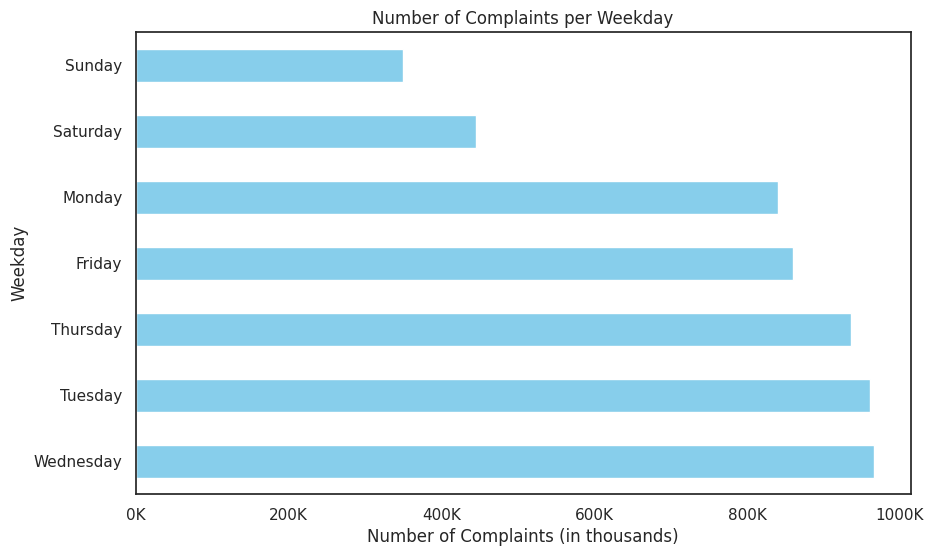

In [25]:

# Compute value counts for 'Week_Days'
week_days_counts = df['Week_Days'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
week_days_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Complaints per Weekday')
plt.xlabel('Number of Complaints (in thousands)')
plt.ylabel('Weekday')

# Modify the x-axis to show labels in thousands
plt.xticks(ticks=range(0, 1100000, 200000), labels=[f'{x//1000}K' for x in range(0, 1100000, 200000)])

# Display the plot
plt.show()



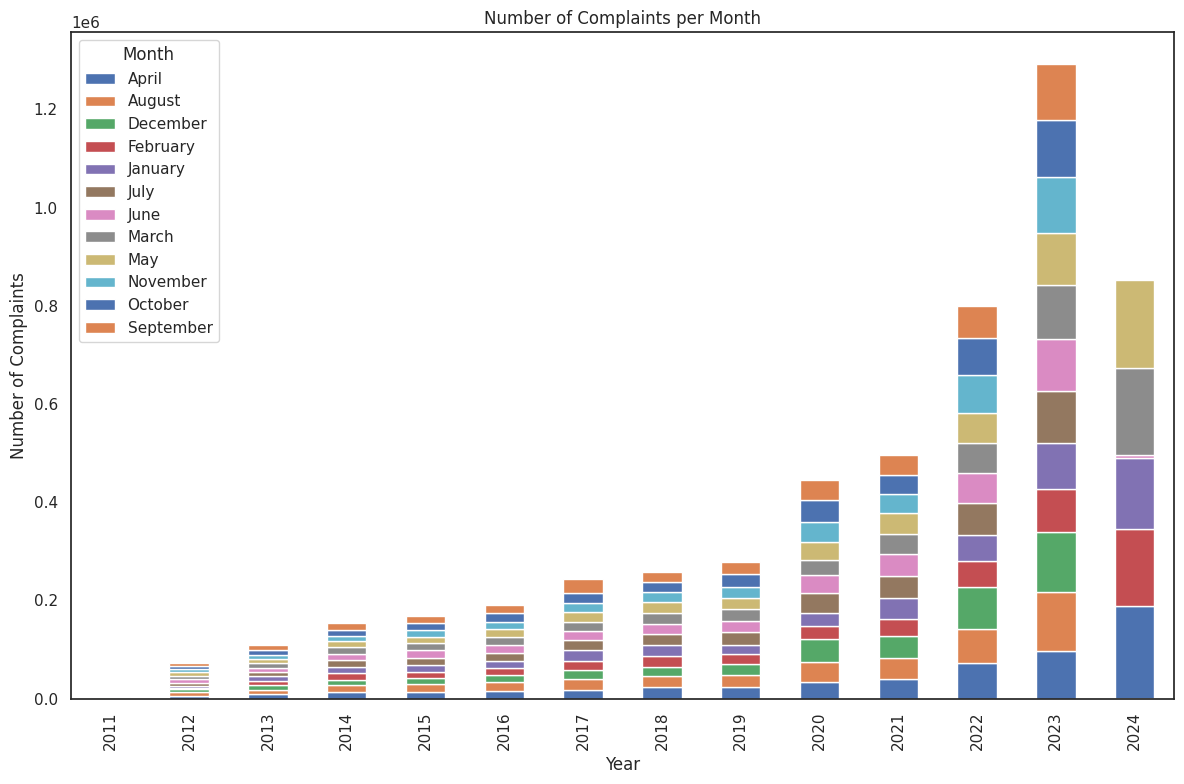

In [26]:
# Assuming df is your DataFrame
cross_tab = pd.crosstab(df['Year'], df['Month'])

# Plotting using Matplotlib
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Complaints per Month')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.legend(title='Month')
plt.tight_layout()

plt.show()

# What is the most common response received from companies?

(-1.099998348879924, 1.099997763097301, -1.0999980929876365, 1.099999474301531)

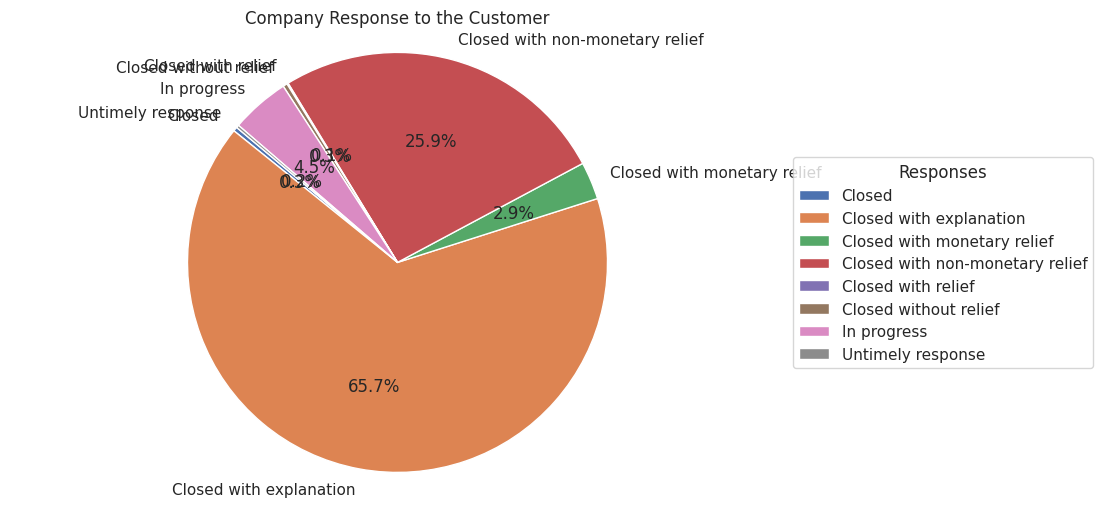

In [27]:
# Grouping the data
grouped = df.groupby(['Company Response To Consumer']).size()

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Company Response to the Customer')

# Adding a legend
ax.legend(wedges, grouped.index, title="Responses", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ensuring the pie chart is drawn as a circle
plt.axis('equal')

# Which state received the largest number of complaints?

In [31]:
state_complaints = df['State'].value_counts().reset_index()
state_complaints.columns = ['State', 'Complaints']
state_complaints

,State,Complaints
0,FL,646156
1,CA,609064
2,TX,575407
3,GA,368743
4,NY,344322
...,...,...
58,AA,59
59,MP,58
60,AS,57
61,MH,33


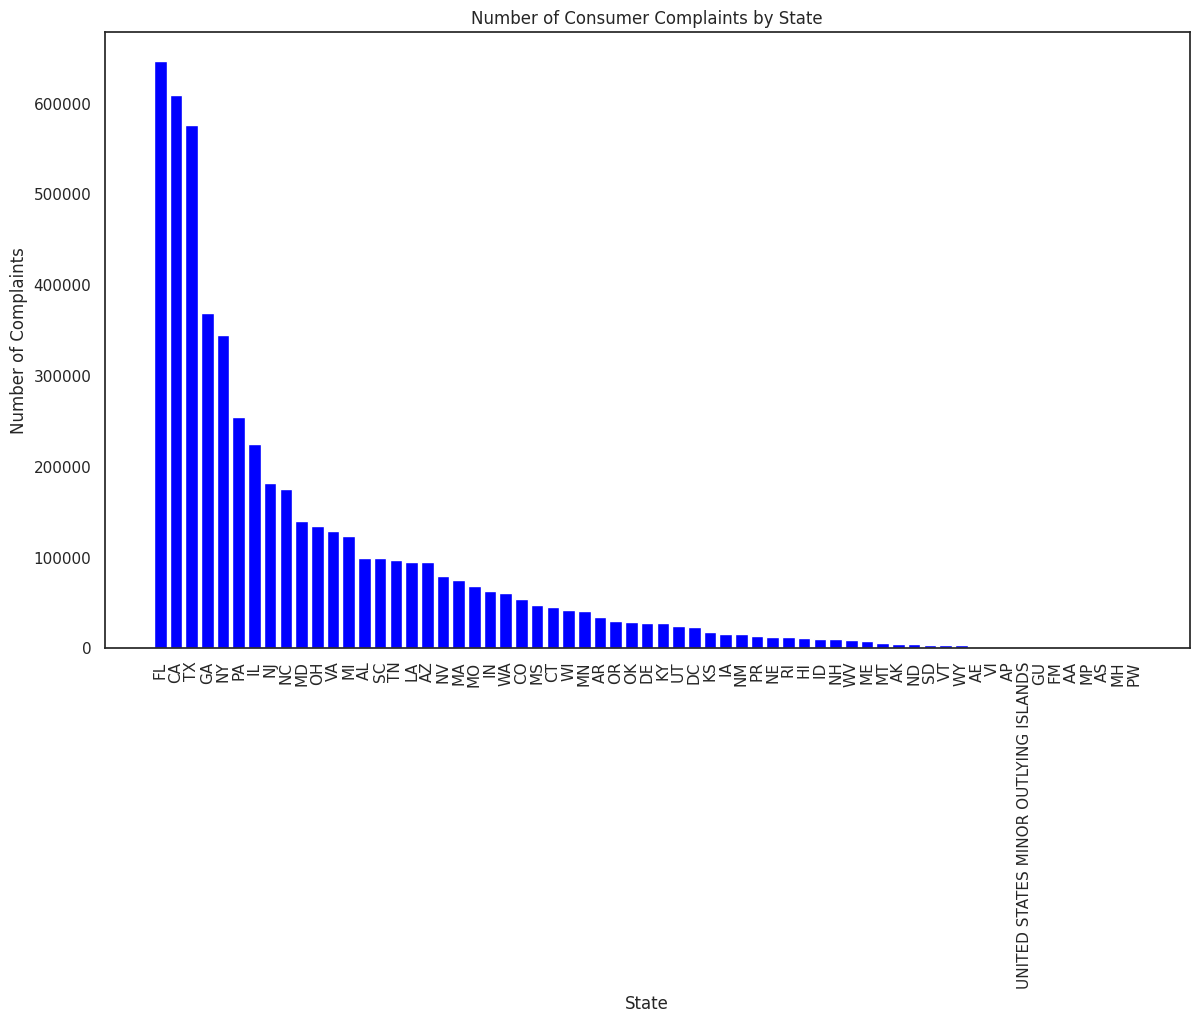

In [35]:
plt.figure(figsize=(14, 8))
plt.bar(state_complaints['State'], state_complaints['Complaints'], color='blue')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.title('Number of Consumer Complaints by State')
plt.xticks(rotation=90)
plt.show()

In [37]:
df

,Date Received,Product,Sub-Product,Issue,Sub-Issue,Consumer Complaint Narrative,Company Public Response,Company,State,Zip Code,...,Submitted Via,Date Sent To Company,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,Date,Year,Month,Week_Days
0,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MA,02115,...,Web,2024-02-26,Closed with non-monetary relief,Yes,No,8424890,2024-02-26,2024,February,Monday
1,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32953,...,Web,2024-02-26,Closed with non-monetary relief,Yes,No,8421008,2024-02-26,2024,February,Monday
2,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,93280,...,Web,2024-02-26,Closed with non-monetary relief,Yes,No,8420474,2024-02-26,2024,February,Monday
3,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NJ,08201,...,Web,2024-02-26,Closed with non-monetary relief,Yes,No,8416259,2024-02-26,2024,February,Monday
4,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TN,38305,...,Web,2024-02-26,Closed with non-monetary relief,Yes,No,8420946,2024-02-26,2024,February,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358360,2013-06-04,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,43318,...,Web,2013-06-05,Closed with explanation,Yes,No,424184,2013-06-04,2013,June,Tuesday
5358361,2011-12-30,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,NaN,NaN,JPMORGAN CHASE & CO.,FL,33436,...,Referral,2011-12-30,Closed without relief,No,No,69708,2011-12-30,2011,December,Friday
5358362,2013-04-23,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BANKUNITED, NATIONAL ASSOCIATION",FL,34280,...,Referral,2013-04-23,Closed with explanation,Yes,No,390852,2013-04-23,2013,April,Tuesday
5358363,2013-03-05,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,"Prospect Mortgage, LLC",NY,11433,...,Web,2013-03-05,Closed with explanation,Yes,No,341832,2013-03-05,2013,March,Tuesday
